In [1]:
import csv

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'handgesture_landmarks.csv'
model_save_path = 'handgesture_classifier.hdf5'
tflite_save_path = 'handgesture_classifier.tflite'
csv_data = "csv_data.csv"

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [4]:
data = pd.read_csv(dataset, header = None)
data = data.apply(pd.to_numeric, errors='coerce')

df_first = data[range(1, 43)]
df_second = data[range(43, 85)]
distance = data[85]

df_second

,43,44,45,46,47,48,49,50,51,52,...,75,76,77,78,79,80,81,82,83,84
0,0.0,0.0,0.116959,-0.333333,0.292398,-0.578947,0.403509,-0.812865,0.380117,-1.000000,...,0.561404,-0.099415,0.596491,0.152047,0.672515,0.058480,0.590643,0.040936,0.508772,0.052632
1,0.0,0.0,0.114943,-0.327586,0.293103,-0.580460,0.390805,-0.810345,0.356322,-1.000000,...,0.563218,-0.103448,0.591954,0.143678,0.672414,0.045977,0.597701,0.028736,0.511494,0.045977
2,0.0,0.0,0.107955,-0.323864,0.284091,-0.579545,0.380682,-0.812500,0.335227,-1.000000,...,0.562500,-0.113636,0.590909,0.136364,0.670455,0.028409,0.596591,0.017045,0.517045,0.039773
3,0.0,0.0,0.106145,-0.324022,0.268156,-0.586592,0.340782,-0.821229,0.296089,-1.000000,...,0.558659,-0.122905,0.569832,0.122905,0.675978,0.011173,0.597765,-0.005587,0.519553,0.016760
4,0.0,0.0,0.101124,-0.320225,0.247191,-0.584270,0.320225,-0.820225,0.280899,-1.000000,...,0.573034,-0.129213,0.567416,0.123596,0.702247,0.000000,0.623596,-0.016854,0.544944,0.011236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33839,0.0,0.0,-0.306931,-0.108911,-0.643564,-0.277228,-0.752475,-0.316832,-0.574257,-0.297030,...,-0.069307,-0.099010,0.653465,-0.613861,0.435644,-0.009901,0.297030,0.089109,0.267327,-0.009901
33840,0.0,0.0,-0.313043,-0.095652,-0.652174,-0.278261,-0.747826,-0.365217,-0.478261,-0.356522,...,-0.139130,-0.026087,0.539130,-0.643478,0.365217,-0.130435,0.226087,0.026087,0.165217,-0.008696
33841,0.0,0.0,-0.318966,-0.077586,-0.655172,-0.250000,-0.758621,-0.344828,-0.491379,-0.353448,...,-0.163793,-0.034483,0.525862,-0.629310,0.344828,-0.129310,0.198276,0.025862,0.120690,0.000000
33842,0.0,0.0,-0.313043,-0.104348,-0.660870,-0.295652,-0.747826,-0.400000,-0.460870,-0.373913,...,-0.156522,-0.043478,0.539130,-0.660870,0.365217,-0.182609,0.200000,-0.008696,0.113043,-0.008696


In [5]:

df_second_list = df_second.to_numpy()
df_first_list = df_first.to_numpy()
distance_list = distance.to_numpy()


df_first_list.shape


(33844, 42)

In [6]:
X_dataset = np.stack((np.array(df_first_list).reshape(len(df_first_list),42), np.array(df_second_list).reshape(len(df_second_list),42)), axis=1)
X_dataset =X_dataset.astype('float32')
X_dataset.shape

(33844, 2, 42)

In [9]:
#label colum
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
y_dataset.shape

(33844,)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((2, 42)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(42, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 84)                0         
                                                                 
 dropout (Dropout)           (None, 84)                0         
                                                                 
 dense (Dense)               (None, 42)                3570      
                                                                 
 dropout_1 (Dropout)         (None, 42)                0         
                                                                 
 dense_1 (Dense)             (None, 28)                1204      
                                                                 
 dense_2 (Dense)             (None, 24)                696       
                                                                 
Total params: 5,470
Trainable params: 5,470
Non-trainabl

In [13]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [14]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [15]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
199/199 [==============================] - ETA: 0s - loss: 2.7007 - accuracy: 0.2145
Epoch 1: saving model to handgesture_classifier.hdf5
199/199 [==============================] - 2s 7ms/step - loss: 2.7007 - accuracy: 0.2145 - val_loss: 1.8954 - val_accuracy: 0.5512
Epoch 2/1000
199/199 [==============================] - ETA: 0s - loss: 1.8713 - accuracy: 0.4323
Epoch 2: saving model to handgesture_classifier.hdf5
199/199 [==============================] - 1s 6ms/step - loss: 1.8713 - accuracy: 0.4323 - val_loss: 1.2778 - val_accuracy: 0.6889
Epoch 3/1000
192/199 [===========================>..] - ETA: 0s - loss: 1.5471 - accuracy: 0.5180
Epoch 3: saving model to handgesture_classifier.hdf5
199/199 [==============================] - 1s 7ms/step - loss: 1.5442 - accuracy: 0.5187 - val_loss: 1.0447 - val_accuracy: 0.7258
Epoch 4/1000
192/199 [===========================>..] - ETA: 0s - loss: 1.3910 - accuracy: 0.5602
Epoch 4: saving model to handgesture_classifier.hdf5
199

In [16]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

67/67 [==============================] - 0s 3ms/step - loss: 0.4131 - accuracy: 0.8906


In [17]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [18]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 55ms/step
[2.3197074e-06 7.5672278e-06 1.0500145e-08 1.8150341e-11 2.8743289e-05
 9.5661223e-10 1.7801493e-06 9.1216580e-06 1.0726822e-11 9.7336549e-11
 9.9189841e-05 6.1551094e-05 2.9344546e-06 1.1728062e-07 1.9258752e-09
 2.9433338e-14 7.8612551e-08 5.8661317e-06 7.1931239e-11 2.6134835e-04
 9.1153157e-01 8.7987736e-02 9.7886030e-08 1.8956483e-15]
20


# Confusion matrix

265/265 [==============================] - 0s 1ms/step


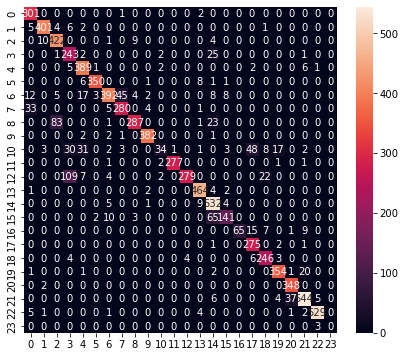

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       304
           1       0.96      0.96      0.96       419
           2       0.82      0.95      0.88       446
           3       0.61      0.89      0.72       274
           4       0.85      0.96      0.90       406
           5       0.98      0.95      0.97       367
           6       0.92      0.79      0.85       496
           7       0.85      0.87      0.86       323
           8       0.95      0.73      0.82       395
           9       0.97      0.98      0.98       388
          10       0.81      0.19      0.30       183
          11       1.00      0.98      0.99       282
          12       0.99      0.66      0.79       423
          13       0.95      0.98      0.96       473
          14       0.79      0.97      0.87       551
          15       0.89      0.64      0.74       221
          16       1.00      0.67      0.80        97
     

/Users/marikruse/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marikruse/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/marikruse/miniforge3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [20]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [21]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/fy/66rzb6257bj8nry5wy4rqrsc0000gn/T/tmpeeyymuco/assets


10184

# Inference test

In [22]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [23]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

myarr = np.array([X_test[0]])
myarr.shape

(1, 2, 42)

In [24]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]], dtype='float32'))

In [25]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 296 µs, sys: 430 µs, total: 726 µs
Wall time: 956 µs


In [26]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.2420031e-06 7.9992669e-06 1.2731845e-08 2.2658955e-11 2.9316276e-05
 1.0489918e-09 1.8209045e-06 8.5645543e-06 1.3361582e-11 1.0723609e-10
 9.4786737e-05 6.3661144e-05 3.1445365e-06 1.1986457e-07 2.0794557e-09
 3.9701176e-14 8.1056946e-08 5.7980910e-06 8.4987822e-11 2.6635369e-04
 9.0827078e-01 9.1245241e-02 1.1580130e-07 3.1568535e-15]
20
